**This notebook will help us explore and understand the dataset by checking its structure, visualizing word distributions, identifying class imbalance, and investigating other relevant features.**

In [ ]:
# notebooks/EDA.ipynb

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Set up for visualization
%matplotlib inline
sns.set(style="whitegrid")

# Load Dataset
data_path = '/content/data.csv'  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
df.info()

# Display the first few rows of the dataset
df.head()


Dataset shape: (4009, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


**Step 1: Initial Data Exploration**

Missing values in each column:
 URLs         0
Headline     0
Body        21
Label        0
dtype: int64
Dataset shape after dropping missing values: (3988, 4)
Class distribution:
 Label
0    2120
1    1868
Name: count, dtype: int64


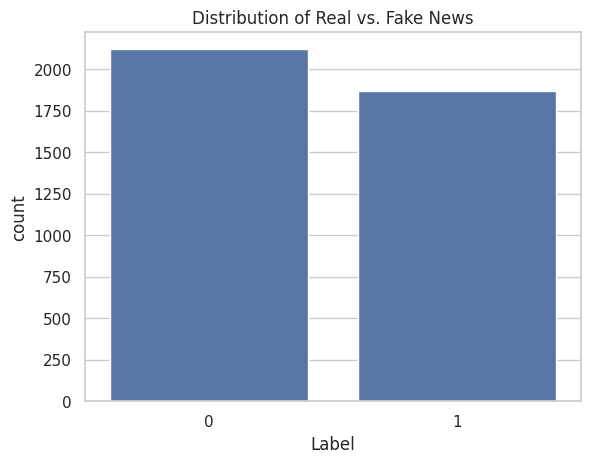

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if any)
df.dropna(inplace=True)
print("Dataset shape after dropping missing values:", df.shape)

# Show class distribution
print("Class distribution:\n", df['Label'].value_counts())
sns.countplot(x='Label', data=df)
plt.title("Distribution of Real vs. Fake News")
plt.show()


**Step 2: Basic Text Analysis**

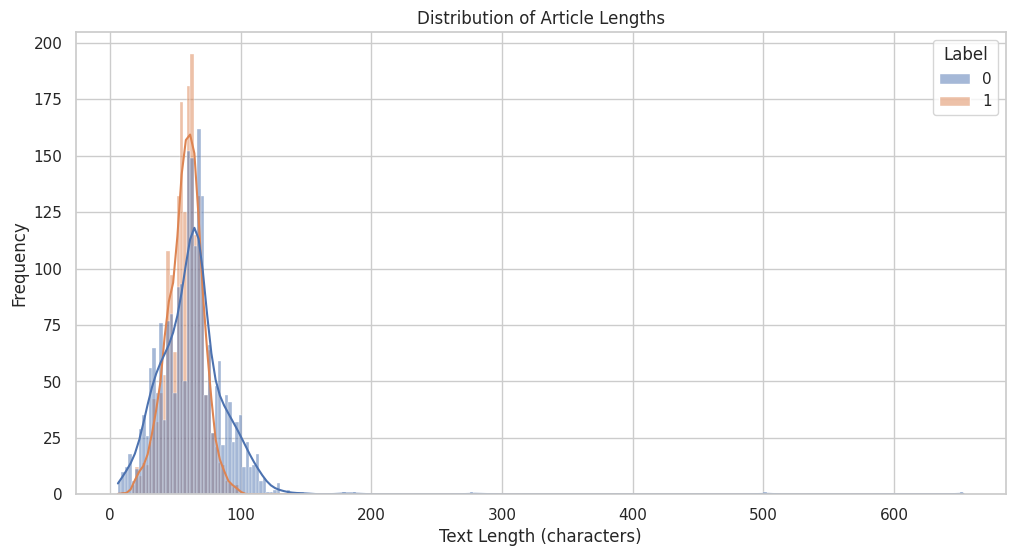

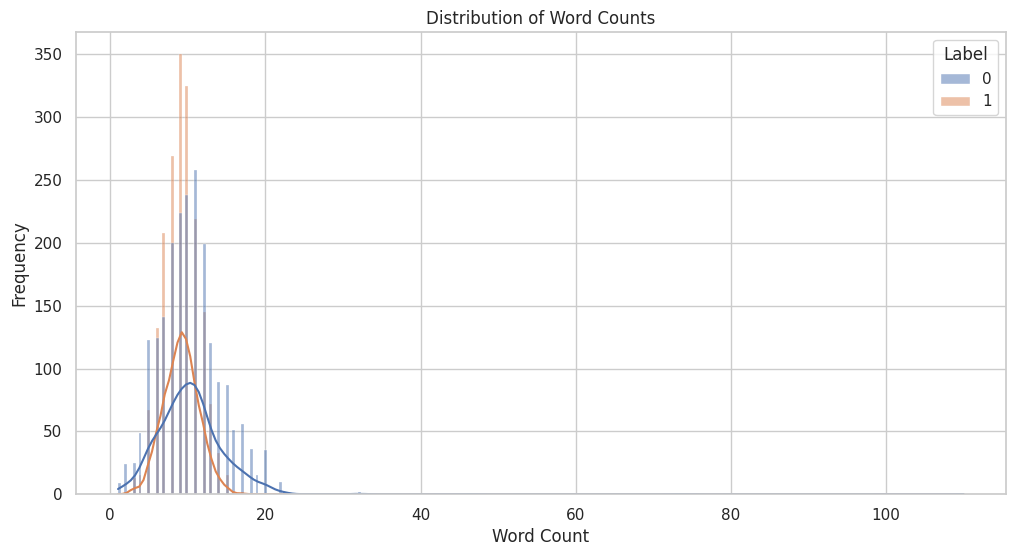

In [ ]:
# Calculate the length of each news article (number of characters)
df['text_length'] = df['Headline'].apply(len)

# Distribution of text length by class
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='Label', kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Word count per article
df['word_count'] = df['Headline'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='Label', kde=True)
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


**Step 3: Word Clouds for Fake and Real News**

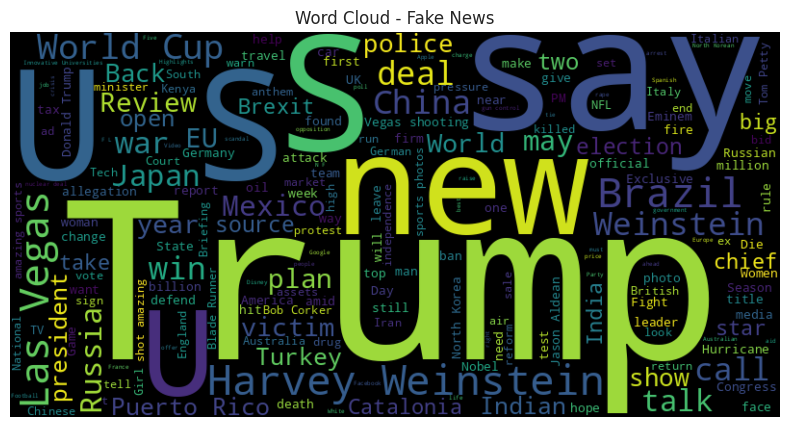

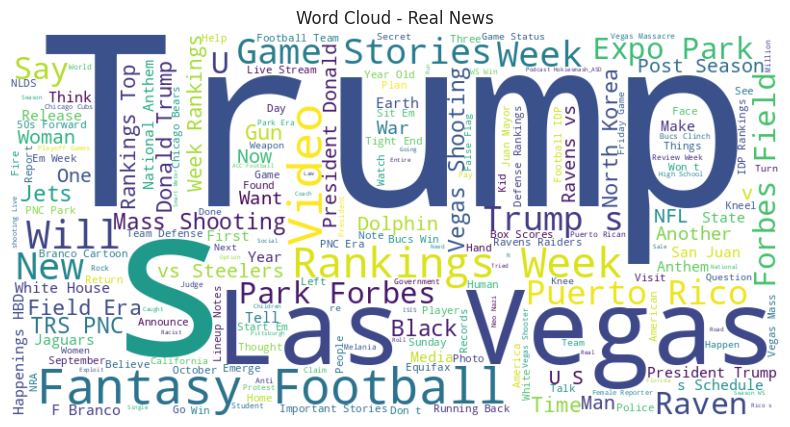

In [ ]:
# Generate WordCloud for Fake News
fake_text = " ".join(df[df['Label'] == 1]['Headline'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Word Cloud - Fake News")
plt.axis('off')
plt.show()

# Generate WordCloud for Real News
real_text = " ".join(df[df['Label'] == 0]['Headline'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title("Word Cloud - Real News")
plt.axis('off')
plt.show()


**Step 4: Common Words in Fake vs. Real News**

Top 20 words in Fake News:
          Word  Frequency
0        trump        202
1         says         87
2    weinstein         79
3          new         70
4        world         68
5        vegas         60
6       brazil         47
7       harvey         46
8         deal         45
9          cup         44
10         las         42
11       china         36
12      russia         34
13      mexico         32
14      police         32
15       japan         30
16         war         28
17  california         28
18        2018         26
19          eu         26
Top 20 words in Real News:
         Word  Frequency
0       trump        219
1        week        171
2        2017        155
3          10        155
4        game        111
5       vegas        106
6    football         96
7    rankings         87
8     fantasy         83
9         hbd         78
10        las         72
11      video         71
12        win         70
13   shooting         70
14        new         68


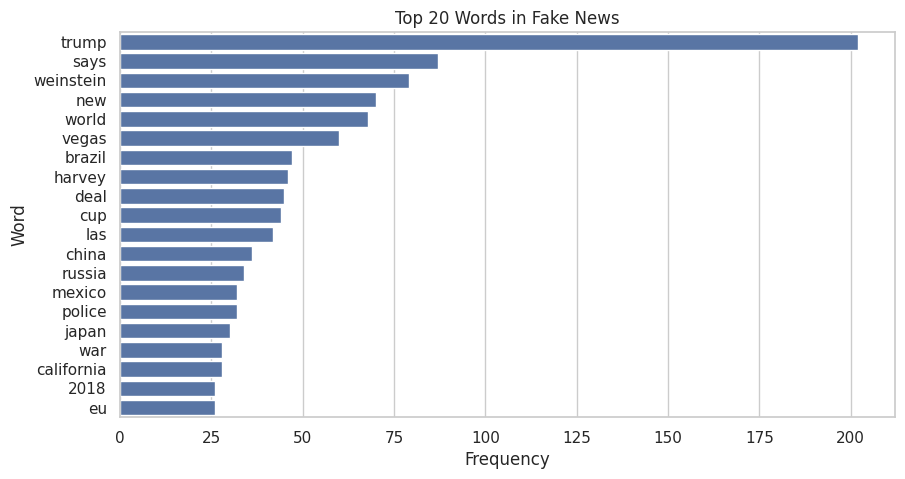

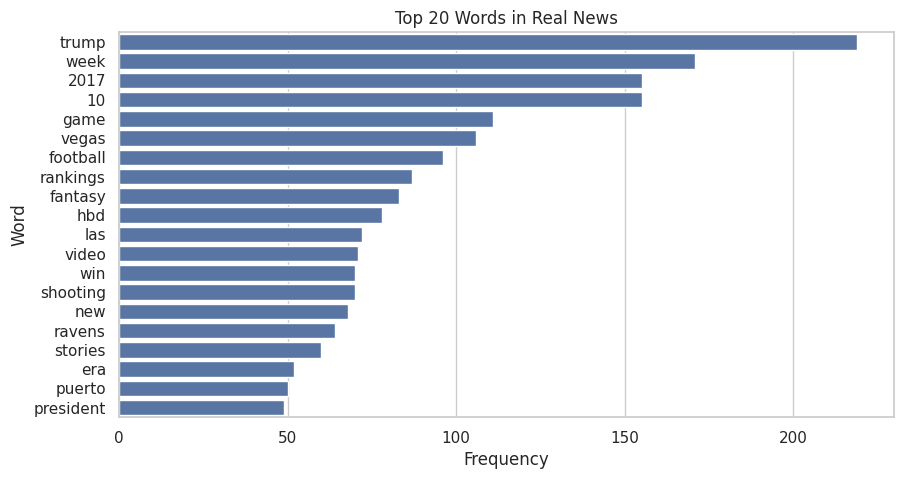

In [ ]:
# Top 20 most common words in Fake and Real news
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Most common words in Fake News
fake_words = get_top_n_words(df[df['Label'] == 1]['Headline'], 20)
df_fake_words = pd.DataFrame(fake_words, columns=['Word', 'Frequency'])
print("Top 20 words in Fake News:")
print(df_fake_words)

# Most common words in Real News
real_words = get_top_n_words(df[df['Label'] == 0]['Headline'], 20)
df_real_words = pd.DataFrame(real_words, columns=['Word', 'Frequency'])
print("Top 20 words in Real News:")
print(df_real_words)

# Visualize top words in Fake News
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=df_fake_words)
plt.title("Top 20 Words in Fake News")
plt.show()

# Visualize top words in Real News
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=df_real_words)
plt.title("Top 20 Words in Real News")
plt.show()


**Step 5: Sentiment Analysis**
 to explore sentiment, you can use a library like **TextBlob** to calculate sentiment polarity for each article.

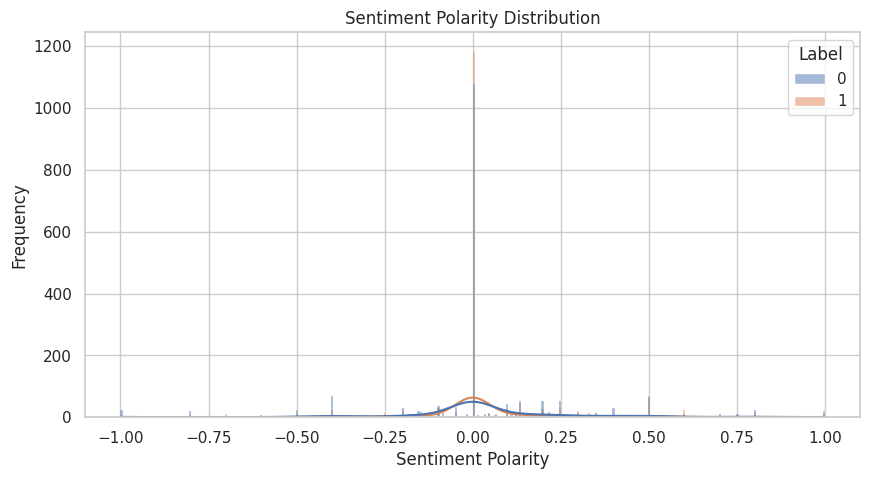

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment_polarity'] = df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='sentiment_polarity', hue='Label', kde=True)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load Dataset
data_path = '/content/data.csv'  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Preprocessing the Data
X = df['Headline']  # Features: News text
y = df['Label']  # Labels: 0 for fake, 1 for real

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a function to train and evaluate models
def train_and_evaluate(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print the results
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# 1. Random Forest Classifier
rf_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
train_and_evaluate(rf_model, "Random Forest Classifier")

# 2. Support Vector Machine (SVM)
svm_model = make_pipeline(TfidfVectorizer(), SVC(random_state=42))
train_and_evaluate(svm_model, "Support Vector Machine (SVM)")

# 3. Logistic Regression
lr_model = make_pipeline(TfidfVectorizer(), LogisticRegression(random_state=42))
train_and_evaluate(lr_model, "Logistic Regression")

# 4. Naive Bayes Classifier
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
train_and_evaluate(nb_model, "Naive Bayes Classifier")


Random Forest Classifier:
Accuracy: 0.83
Precision: 0.78
Recall: 0.85
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       669
           1       0.78      0.85      0.82       534

    accuracy                           0.83      1203
   macro avg       0.83      0.83      0.83      1203
weighted avg       0.83      0.83      0.83      1203

------------------------------------------------------------
Support Vector Machine (SVM):
Accuracy: 0.87
Precision: 0.83
Recall: 0.88
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       669
           1       0.83      0.88      0.86       534

    accuracy                           0.87      1203
   macro avg       0.87      0.87      0.87      1203
weighted avg       0.87      0.87      0.87      1203

------------------------------------------------------------
Logistic Regression:
Accuracy: 0.83
Precision: 0.80
Recall: 0.81
              p